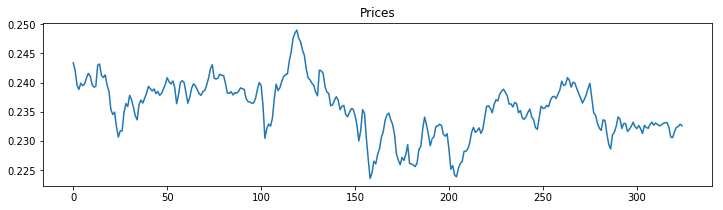

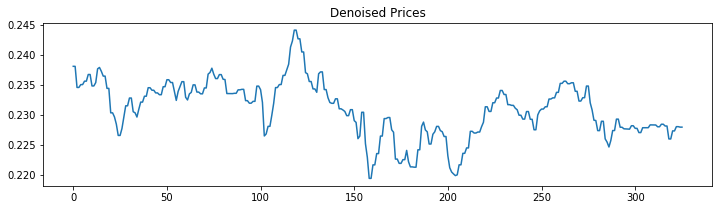

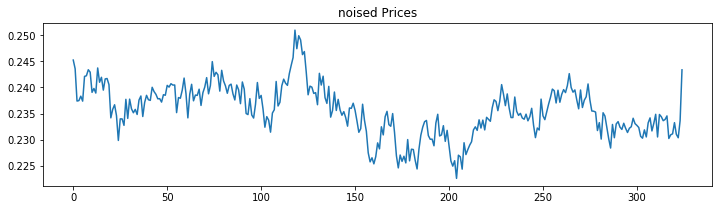

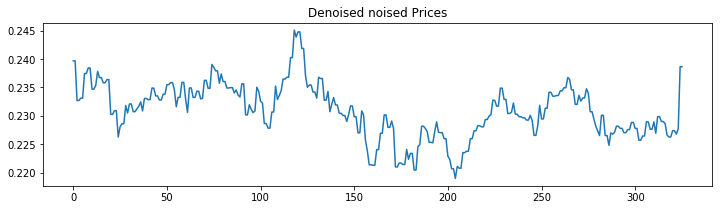

In [37]:
import numpy as np
import pandas as pd
import pywt
from matplotlib import pyplot as plt
import random

# original data
data = pd.read_csv("rates_data.csv", sep = ';')
x = np.array(data.iloc[0: len(data), 1])
xd = np.array(data.iloc[0: len(data), 1])
x = x[::-1]
plt.rcParams["figure.figsize"] = (12,3)
plt.plot(x)
plt.title("Prices")
plt.show()

# denoised data 
(ca, cd) = pywt.dwt(x, "haar")                
cat = pywt.threshold(ca, np.std(ca), mode="soft")                
cdt = pywt.threshold(cd, np.std(cd), mode="soft")                
tx = pywt.idwt(cat, cdt, "haar")
plt.plot(tx)
plt.title("Denoised Prices")
plt.show()

# noised data
sigma = 0.01
for i in range(len(x) - 1):
    xd[i] = x[i] + (sigma*x[i]*(random.random()*2 - 1)) 
plt.plot(xd)
plt.title("noised Prices")
plt.show()

# denoised noised data
(ca, cd) = pywt.dwt(xd, "haar")                
cat = pywt.threshold(ca, np.std(ca), mode="soft")                
cdt = pywt.threshold(cd, np.std(cd), mode="soft")                
txd = pywt.idwt(cat, cdt, "haar")
plt.plot(txd)
plt.title("Denoised noised Prices")
plt.show()
